In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set up visualization style
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Load the dataset
df = pd.read_csv('ncr_ride_bookings.csv')

# First, let's get a feel for the data
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst few rows:")
df.head()

Dataset shape: (150000, 21)

Columns: ['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID', 'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT', 'Avg CTAT', 'Cancelled Rides by Customer', 'Reason for cancelling by Customer', 'Cancelled Rides by Driver', 'Driver Cancellation Reason', 'Incomplete Rides', 'Incomplete Rides Reason', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating', 'Payment Method']

First few rows:


,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [7]:
# Check data types and missing values
print("Data Types:")
print(df.dtypes)
print("\nMissing values:")
print(df.isnull().sum())

Data Types:
Date                                  object
Time                                  object
Booking ID                            object
Booking Status                        object
Customer ID                           object
Vehicle Type                          object
Pickup Location                       object
Drop Location                         object
Avg VTAT                             float64
Avg CTAT                             float64
Cancelled Rides by Customer          float64
Reason for cancelling by Customer     object
Cancelled Rides by Driver            float64
Driver Cancellation Reason            object
Incomplete Rides                     float64
Incomplete Rides Reason               object
Booking Value                        float64
Ride Distance                        float64
Driver Ratings                       float64
Customer Rating                      float64
Payment Method                        object
dtype: object

Missing values:
Date        

In [8]:
# Create a copy for cleaning
df_clean = df.copy()

# Remove quotes from string columns
string_cols = ['Booking ID', 'Customer ID', 'Pickup Location', 'Drop Location', 
               'Reason for cancelling by Customer', 'Driver Cancellation Reason', 
               'Incomplete Rides Reason', 'Payment Method']

for col in string_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].str.replace('"', '')

# Convert date and time to datetime
df_clean['DateTime'] = pd.to_datetime(df_clean['Date'] + ' ' + df_clean['Time'])
df_clean['Hour'] = df_clean['DateTime'].dt.hour
df_clean['DayOfWeek'] = df_clean['DateTime'].dt.day_name()
df_clean['Month'] = df_clean['DateTime'].dt.month_name()

# Check booking status distribution
status_counts = df_clean['Booking Status'].value_counts()
print("Booking Status Distribution:")
print(status_counts)

Booking Status Distribution:
Booking Status
Completed                93000
Cancelled by Driver      27000
No Driver Found          10500
Cancelled by Customer    10500
Incomplete                9000
Name: count, dtype: int64


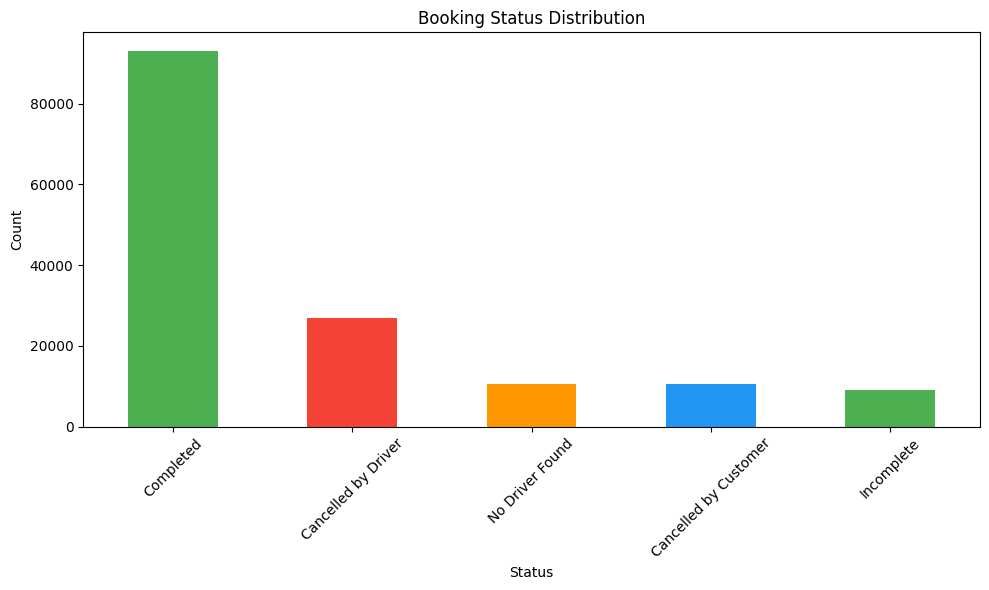

In [9]:
# Plot booking status
plt.figure(figsize=(10, 6))
status_counts.plot(kind='bar', color=['#4CAF50', '#F44336', '#FF9800', '#2196F3'])
plt.title('Booking Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Filter only completed rides
completed_rides = df_clean[df_clean['Booking Status'] == 'Completed']

print(f"Completed rides: {len(completed_rides)}")
print(f"Average booking value: ₹{completed_rides['Booking Value'].mean():.2f}")
print(f"Average ride distance: {completed_rides['Ride Distance'].mean():.2f} km")
print(f"Average driver rating: {completed_rides['Driver Ratings'].mean():.2f}")
print(f"Average customer rating: {completed_rides['Customer Rating'].mean():.2f}")

# Check vehicle type distribution for completed rides
vehicle_counts = completed_rides['Vehicle Type'].value_counts()
print("\nVehicle Type Distribution for Completed Rides:")
print(vehicle_counts)

Completed rides: 93000
Average booking value: ₹508.18
Average ride distance: 26.00 km
Average driver rating: 4.23
Average customer rating: 4.40

Vehicle Type Distribution for Completed Rides:
Vehicle Type
Auto             23155
Go Mini          18549
Go Sedan         16676
Bike             14034
Premier Sedan    11252
eBike             6551
Uber XL           2783
Name: count, dtype: int64


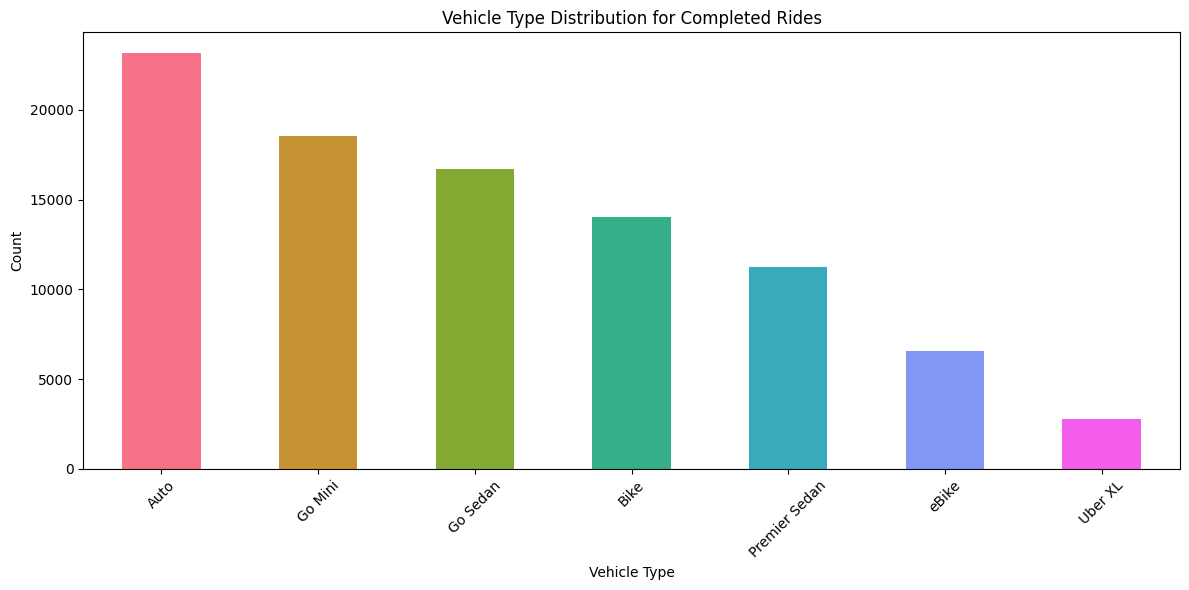

In [11]:
# Plot vehicle type distribution
plt.figure(figsize=(12, 6))
vehicle_counts.plot(kind='bar', color=sns.color_palette("husl", len(vehicle_counts)))
plt.title('Vehicle Type Distribution for Completed Rides')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Analyze cancellations
cancelled_by_customer = df_clean[df_clean['Booking Status'] == 'Cancelled by Customer']
cancelled_by_driver = df_clean[df_clean['Booking Status'] == 'Cancelled by Driver']

print(f"Cancelled by customer: {len(cancelled_by_customer)}")
print(f"Cancelled by driver: {len(cancelled_by_driver)}")

# Reasons for customer cancellation
customer_reasons = cancelled_by_customer['Reason for cancelling by Customer'].value_counts()
print("\nCustomer Cancellation Reasons:")
print(customer_reasons)

# Reasons for driver cancellation  
driver_reasons = cancelled_by_driver['Driver Cancellation Reason'].value_counts()
print("\nDriver Cancellation Reasons:")
print(driver_reasons)

Cancelled by customer: 10500
Cancelled by driver: 27000

Customer Cancellation Reasons:
Reason for cancelling by Customer
Wrong Address                                   2362
Change of plans                                 2353
Driver is not moving towards pickup location    2335
Driver asked to cancel                          2295
AC is not working                               1155
Name: count, dtype: int64

Driver Cancellation Reasons:
Driver Cancellation Reason
Customer related issue                 6837
The customer was coughing/sick         6751
Personal & Car related issues          6726
More than permitted people in there    6686
Name: count, dtype: int64


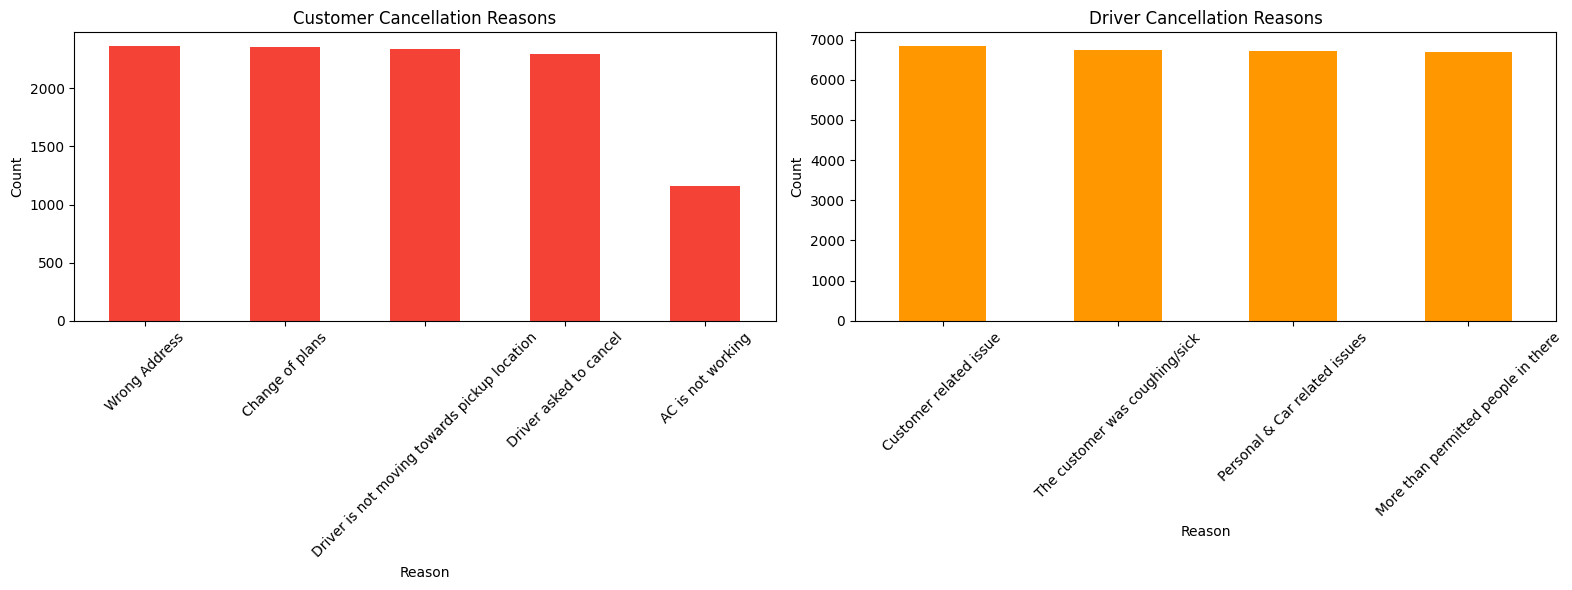

In [13]:
# Plot cancellation reasons
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

customer_reasons.plot(kind='bar', ax=ax1, color='#F44336')
ax1.set_title('Customer Cancellation Reasons')
ax1.set_xlabel('Reason')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

driver_reasons.plot(kind='bar', ax=ax2, color='#FF9800')
ax2.set_title('Driver Cancellation Reasons')
ax2.set_xlabel('Reason')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

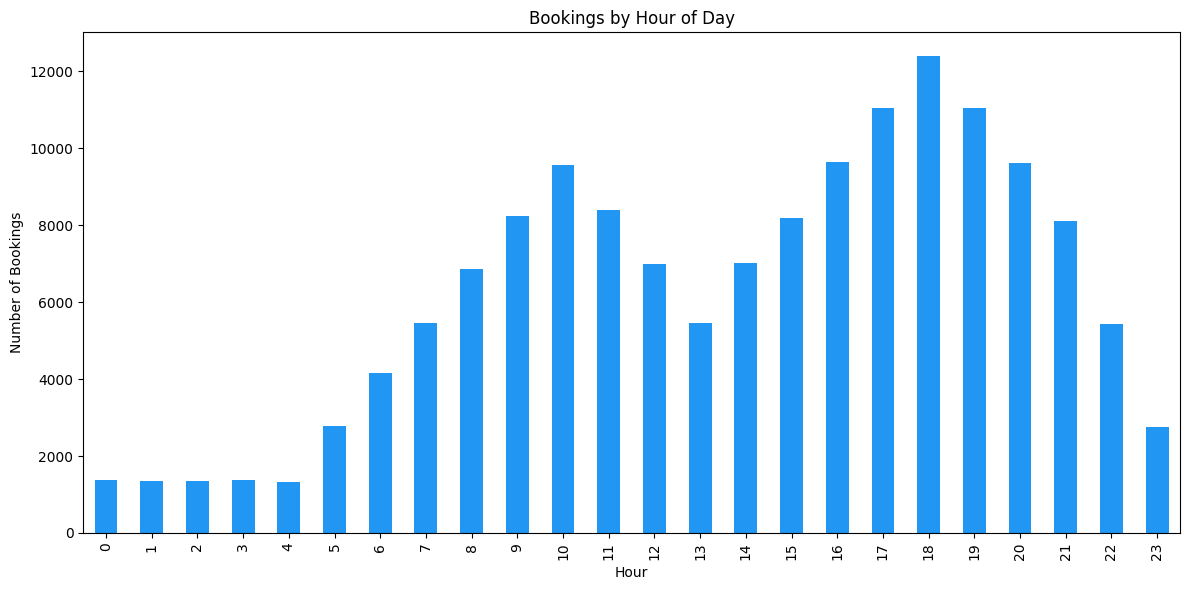

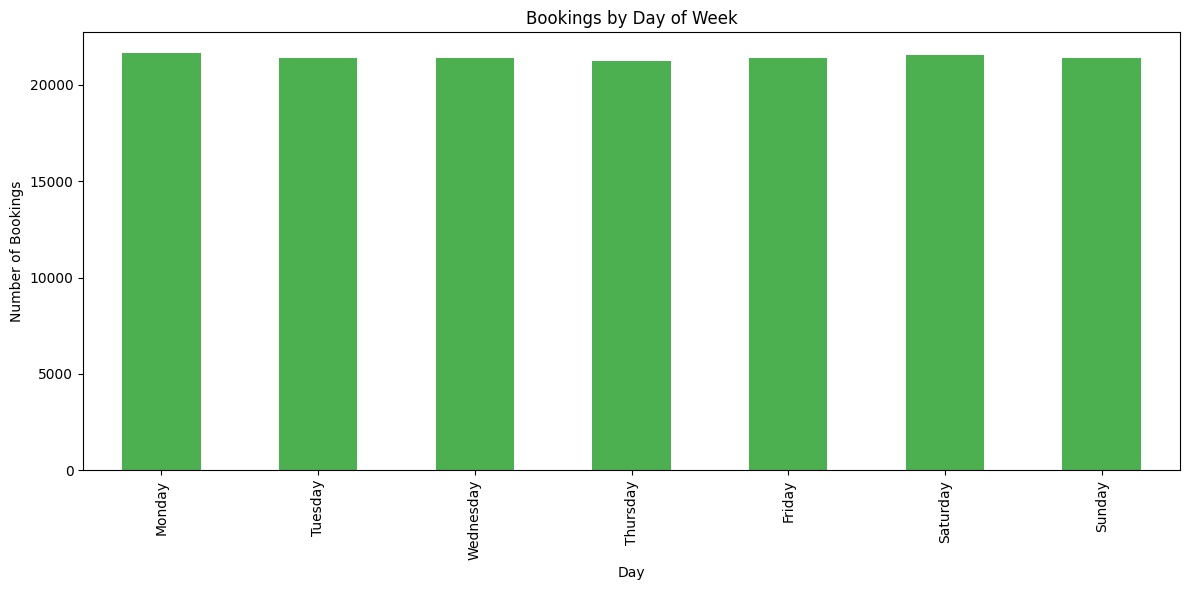

In [14]:
# Analyze bookings by hour
hourly_bookings = df_clean.groupby('Hour').size()

plt.figure(figsize=(12, 6))
hourly_bookings.plot(kind='bar', color='#2196F3')
plt.title('Bookings by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

# Analyze by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_bookings = df_clean.groupby('DayOfWeek').size().reindex(day_order)

plt.figure(figsize=(12, 6))
daily_bookings.plot(kind='bar', color='#4CAF50')
plt.title('Bookings by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

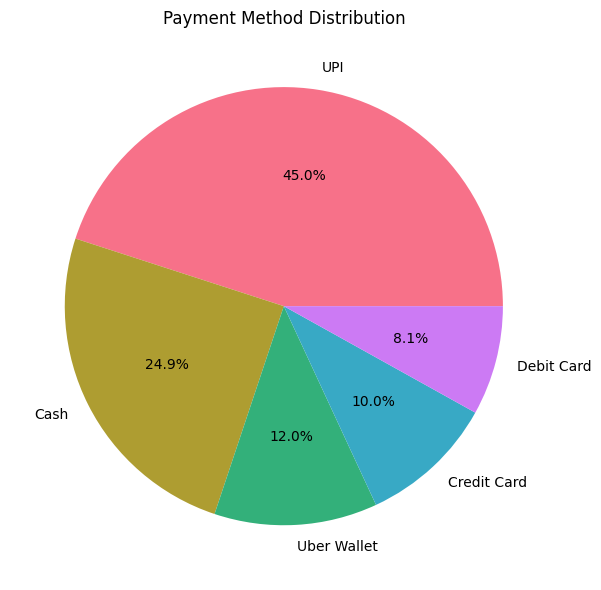

In [15]:
# Payment method analysis
payment_counts = df_clean['Payment Method'].value_counts()

plt.figure(figsize=(10, 6))
payment_counts.plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette("husl", len(payment_counts)))
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

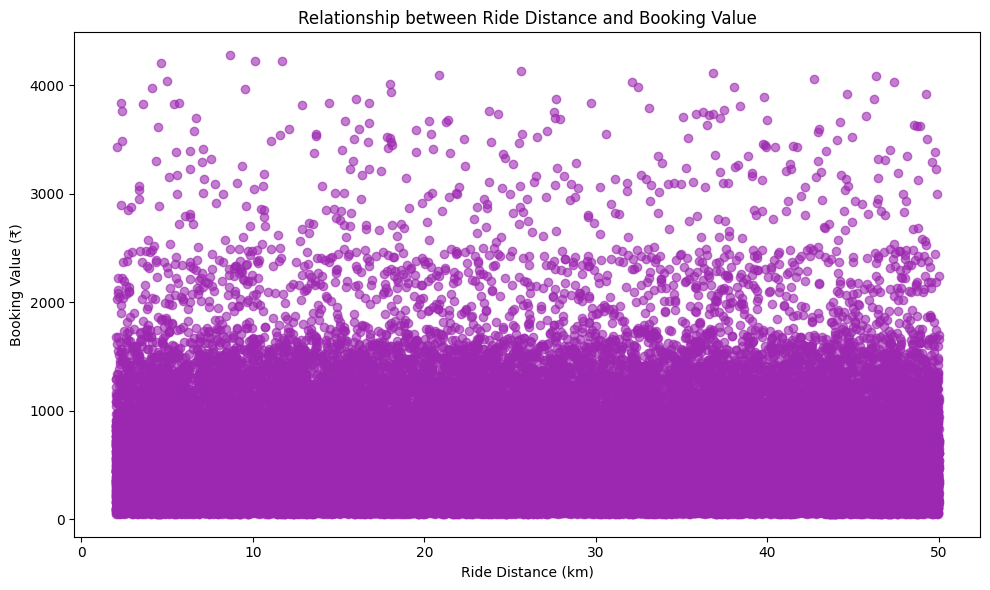

Correlation between distance and value: 0.01


In [16]:
# Filter only completed rides with both distance and value
valid_rides = completed_rides.dropna(subset=['Ride Distance', 'Booking Value'])

plt.figure(figsize=(10, 6))
plt.scatter(valid_rides['Ride Distance'], valid_rides['Booking Value'], alpha=0.6, color='#9C27B0')
plt.title('Relationship between Ride Distance and Booking Value')
plt.xlabel('Ride Distance (km)')
plt.ylabel('Booking Value (₹)')
plt.tight_layout()
plt.show()

# Calculate correlation
correlation = valid_rides['Ride Distance'].corr(valid_rides['Booking Value'])
print(f"Correlation between distance and value: {correlation:.2f}")

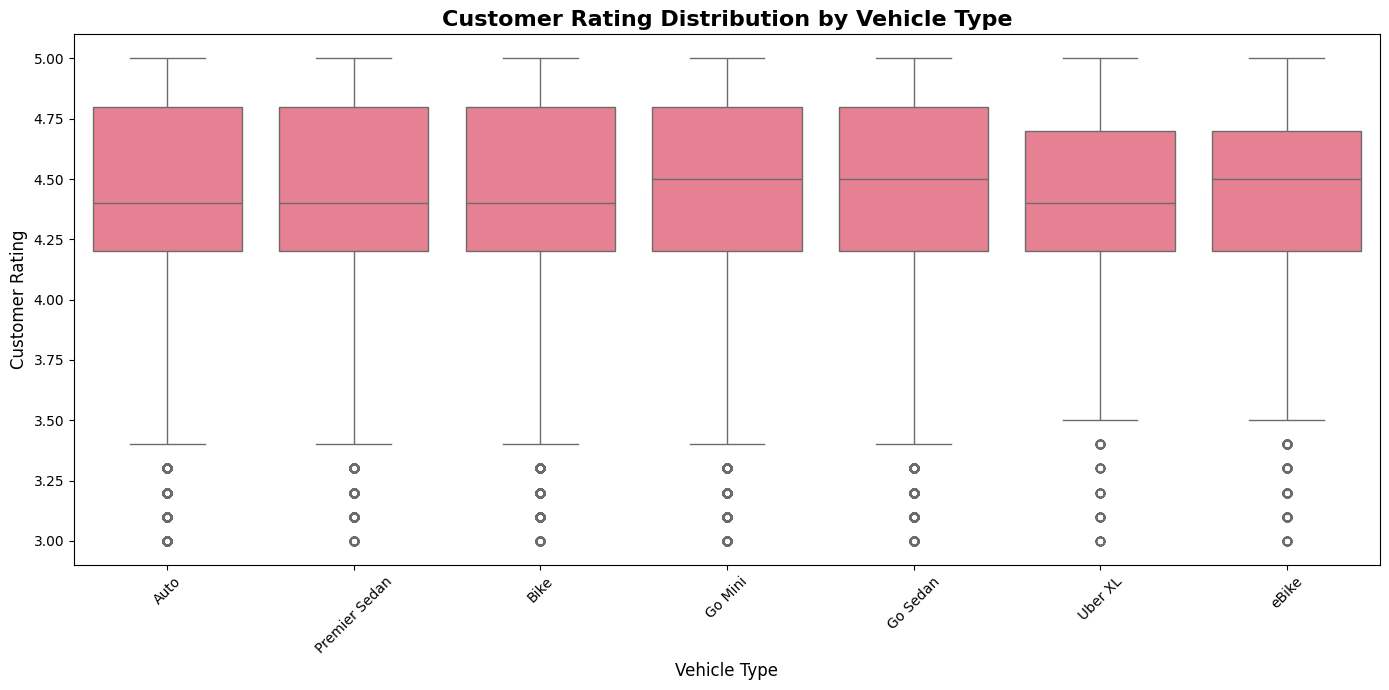

In [17]:
#Boxplot of Customer Rating by Vehicle Type
plt.figure(figsize=(14, 7))
sns.boxplot(data=completed_rides, x='Vehicle Type', y='Customer Rating')
plt.title('Customer Rating Distribution by Vehicle Type', fontsize=16, fontweight='bold')
plt.xlabel('Vehicle Type', fontsize=12)
plt.ylabel('Customer Rating', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()